In [1]:
import yfinance as yf
import numpy as np

In [3]:
df=yf.download(['aapl','cat'],start="2000-12-01",end='2020-12-01')
df

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL         CAT        AAPL         CAT        AAPL   
Date                                                                     
2000-12-01    0.257949   11.188145    0.304688   20.343750    0.312500   
2000-12-04    0.252279   11.909960    0.297991   21.656250    0.306920   
2000-12-05    0.257003   11.927149    0.303571   21.687500    0.311384   
2000-12-06    0.216374   11.428749    0.255580   20.781250    0.267857   
2000-12-07    0.216374   11.428749    0.255580   20.781250    0.265625   
...                ...         ...         ...         ...         ...   
2020-11-23  111.731628  163.159988  113.849998  174.779999  117.620003   
2020-11-24  113.027054  165.139038  115.169998  176.899994  115.849998   
2020-11-25  113.871063  163.019943  116.029999  174.630005  116.750000   
2020-11-27  114.420639  163.440033  116.589996  175.080002  117.489998   
2020-11-30  116.834869  162.049088  119.050003  173.589996  120.970001   

                               Low                    Open              \
                   CAT        AAPL         CAT        AAPL         CAT   
Date                                                                     
2000-12-01   20.625000    0.300223   19.750000    0.303571   19.750000   
2000-12-04   21.968750    0.293527   20.375000    0.306920   20.375000   
2000-12-05   22.125000    0.292411   20.968750    0.302455   21.656250   
2000-12-06   21.343750    0.250000   20.687500    0.261161   21.343750   
2000-12-07   21.250000    0.250000   20.656250    0.257813   20.781250   
...                ...         ...         ...         ...         ...   
2020-11-23  175.500000  113.750000  173.240005  117.180000  173.759995   
2020-11-24  178.320007  112.589996  175.270004  113.910004  176.250000   
2020-11-25  176.479996  115.169998  172.779999  115.550003  176.460007   
2020-11-27  175.919998  116.220001  173.880005  116.570000  174.410004   
2020-11-30  174.880005  116.809998  172.429993  116.970001  173.610001   

                Volume           
                  AAPL      CAT  
Date                             
2000-12-01   385705600  3003600  
2000-12-04   371520800  6023200  
2000-12-05   613978400  5893000  
2000-12-06  1374464000  3086800  
2000-12-07   408917600  2262800  
...                ...      ...  
2020-11-23   127959300  2403500  
2020-11-24   113874200  3447000  
2020-11-25    76499200  2506400  
2020-11-27    46691300   976900  
2020-11-30   169410200  2382600  

[5030 rows x 12 columns]

In [4]:
df=np.log(1+df['Adj Close'].pct_change())
df

,AAPL,CAT
Date,,
2000-12-01,NaN,NaN
2000-12-04,-0.022225,0.062520
2000-12-05,0.018552,0.001442
2000-12-06,-0.172080,-0.042685
2000-12-07,0.000000,0.000000
...,...,...
2020-11-23,-0.030194,0.014697
2020-11-24,0.011527,0.012057
2020-11-25,0.007440,-0.012915


## Calculate portfolio return now

\begin{align*}
R_p &= w_1 R_1 + w_2 R_2 \\
\text{where:} \\
R_p &\text{ is the portfolio return} \\
w_1, w_2 &\text{ are the weights of the assets in the portfolio, such that } w_1 + w_2 = 1 \\
R_1, R_2 &\text{ are the returns of the individual assets}
\end{align*}


In [5]:
weights=[0.5,0.5]

In [7]:
weights[0]*df.AAPL.mean()+weights[1]*df.CAT.mean()

0.000873811974172956

In [10]:
def portfolioreturn(weights):
    return np.dot(df.mean(),weights)



In [11]:
portfolioreturn(weights)

0.000873811974172956

## Calculate portfoilo variance now


\begin{align*}
\sigma^2_p &= w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2\rho_{12}\sigma_1\sigma_2 \\
\text{where:} \\
w_1, w_2 &\text{ are the weights of the assets in the portfolio, such that } w_1 + w_2 = 1 \\
\sigma_1^2, \sigma_2^2 &\text{ are the variances of the individual assets} \\
\rho_{12} &\text{ is the correlation coefficient between the returns of asset 1 and asset 2}
\end{align*}


In [12]:
df.cov()

,AAPL,CAT
AAPL,0.000544,0.000193
CAT,0.000193,0.000410


In [13]:
pv=weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1]

In [14]:
pv

0.0003349955114516957

In [15]:
pv**(1/2)

0.018302882599516825

In [21]:
def portfoliostd(weights):
    return (np.dot(np.dot(df.cov(),weights),weights))**0.5*np.sqrt(250)


In [22]:
portfoliostd(weights)

0.28939398380568304

In [23]:
def weightscreator(df):
    rand=np.random.random(len(df.columns))
    rand/=rand.sum()
    return rand

In [26]:
weightscreator(df) #different weight by each time executing

array([0.71923857, 0.28076143])

In [27]:
returns=[]
stds=[]
w=[]

for i in range(500):
    weights= weightscreator(df)
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

In [30]:
stds


[0.30286116849570505,
 0.29397827803636756,
 0.3638668776978337,
 0.2861915119079064,
 0.29507242264701866,
 0.3190869697867681,
 0.2948232199151693,
 0.3031448987019025,
 0.29504057554560353,
 0.3480240483936087,
 0.28986377228078203,
 0.35044272675823956,
 0.28791832997894956,
 0.2859636194511773,
 0.28904307051557565,
 0.3092949779333394,
 0.28610213060777573,
 0.31471005800718244,
 0.2965584743988724,
 0.2993690352187159,
 0.31826574394857626,
 0.286061982778147,
 0.3608066345037372,
 0.2897609311535337,
 0.30947851419664557,
 0.30530280658188763,
 0.3220301573243033,
 0.3478655393979425,
 0.28933486374055084,
 0.32225600755939643,
 0.3527459580277742,
 0.2875461388780849,
 0.31076459977672494,
 0.2867446870584691,
 0.28599666719139083,
 0.30062015675310644,
 0.29277363592729205,
 0.2868448276451905,
 0.28715178099271255,
 0.33304467187443093,
 0.28851334911347887,
 0.2860180056385605,
 0.35419173535975407,
 0.3104400508861793,
 0.30398530394255,
 0.31758302432175567,
 0.2998123887

In [31]:
import matplotlib.pyplot as plt

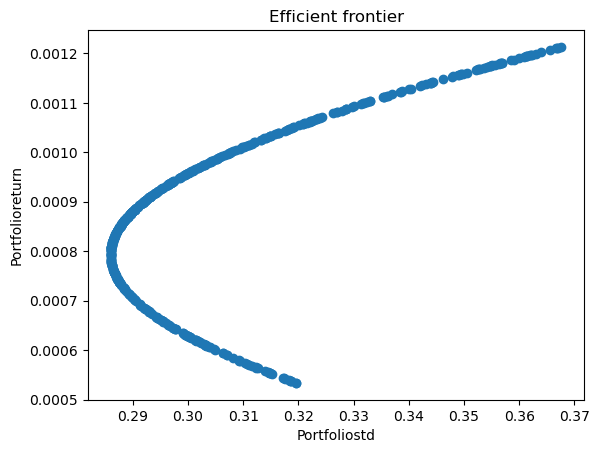

In [43]:
plt.scatter(stds,returns)
plt.title('Efficient frontier')
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")
plt.show()

#to get more than these two assests , add asset above .

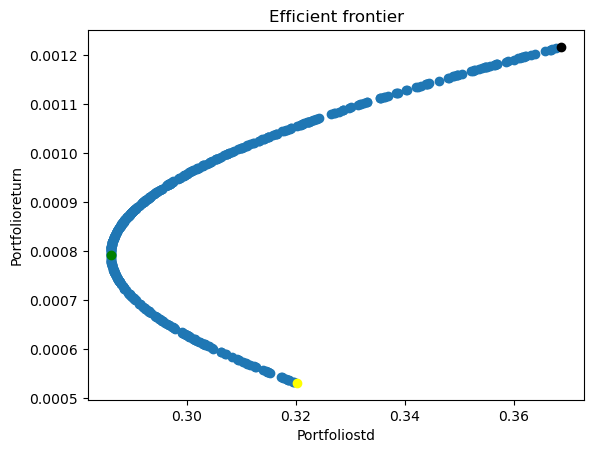

In [42]:
plt.scatter(stds,returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k')
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='yellow')
plt.scatter(min(stds),returns[stds.index(min(stds))],c="g")
plt.title('Efficient frontier')
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")
plt.show()



In [41]:
returns[stds.index(min(stds))]

0.0007928011038991069